In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data
idw_apply_df = pd.read_csv("./datasets/idw_datasets/idw_apply_aws.csv", index_col = 0); aws_df = pd.read_csv("./datasets/idw_datasets/aws.csv", index_col = 0); 
idw_df = pd.read_csv("./datasets/idw_datasets/idw.csv", index_col = 0); pm_df = pd.read_csv("./datasets/idw_datasets/pm_result.csv", index_col = 0); 
idw_apply_df.index = pd.to_datetime(idw_apply_df.index); aws_df.index = pd.to_datetime(aws_df.index) 
idw_df.index = pd.to_datetime(idw_df.index); pm_df.index = pd.to_datetime(pm_df.index)

# set columns name
kind_1 = "IDW"; kind_2 = "AWS"
idw_apply_df_columns_list = [f"{kind_1} Air Temperature", f"{kind_1} U-Component", f"{kind_1} V-Component", 
                             f"{kind_1} Wind Direction", f"{kind_1} Wind Speed", f"{kind_1} Humidity", 
                             f"{kind_1} Visibility", f"{kind_1} WW", ]
aws_df_columns_list = [f"{kind_2} Air Temperature", f"{kind_2} U-Component", f"{kind_2} V-Component", 
                       f"{kind_2} Wind Direction", f"{kind_2} Wind Speed", f"{kind_2} Humidity", 
                       f"{kind_2} Visibility",]
idw_df_columns_list = [f"{kind_1} Air Temperature", f"{kind_1} U-Component", f"{kind_1} V-Component", 
                       f"{kind_1} Wind Direction", f"{kind_1} Wind Speed", f"{kind_1} Humidity", 
                       f"{kind_1} Visibility",]
idw_apply_df.columns = idw_apply_df_columns_list
aws_df.columns = aws_df_columns_list; idw_df.columns = idw_df_columns_list; 

total_df = pd.concat([idw_apply_df, aws_df], axis=1)

In [3]:
# total columns name
total_df.columns

Index(['IDW Air Temperature', 'IDW U-Component', 'IDW V-Component',
       'IDW Wind Direction', 'IDW Wind Speed', 'IDW Humidity',
       'IDW Visibility', 'IDW WW', 'AWS Air Temperature', 'AWS U-Component',
       'AWS V-Component', 'AWS Wind Direction', 'AWS Wind Speed',
       'AWS Humidity', 'AWS Visibility'],
      dtype='object')

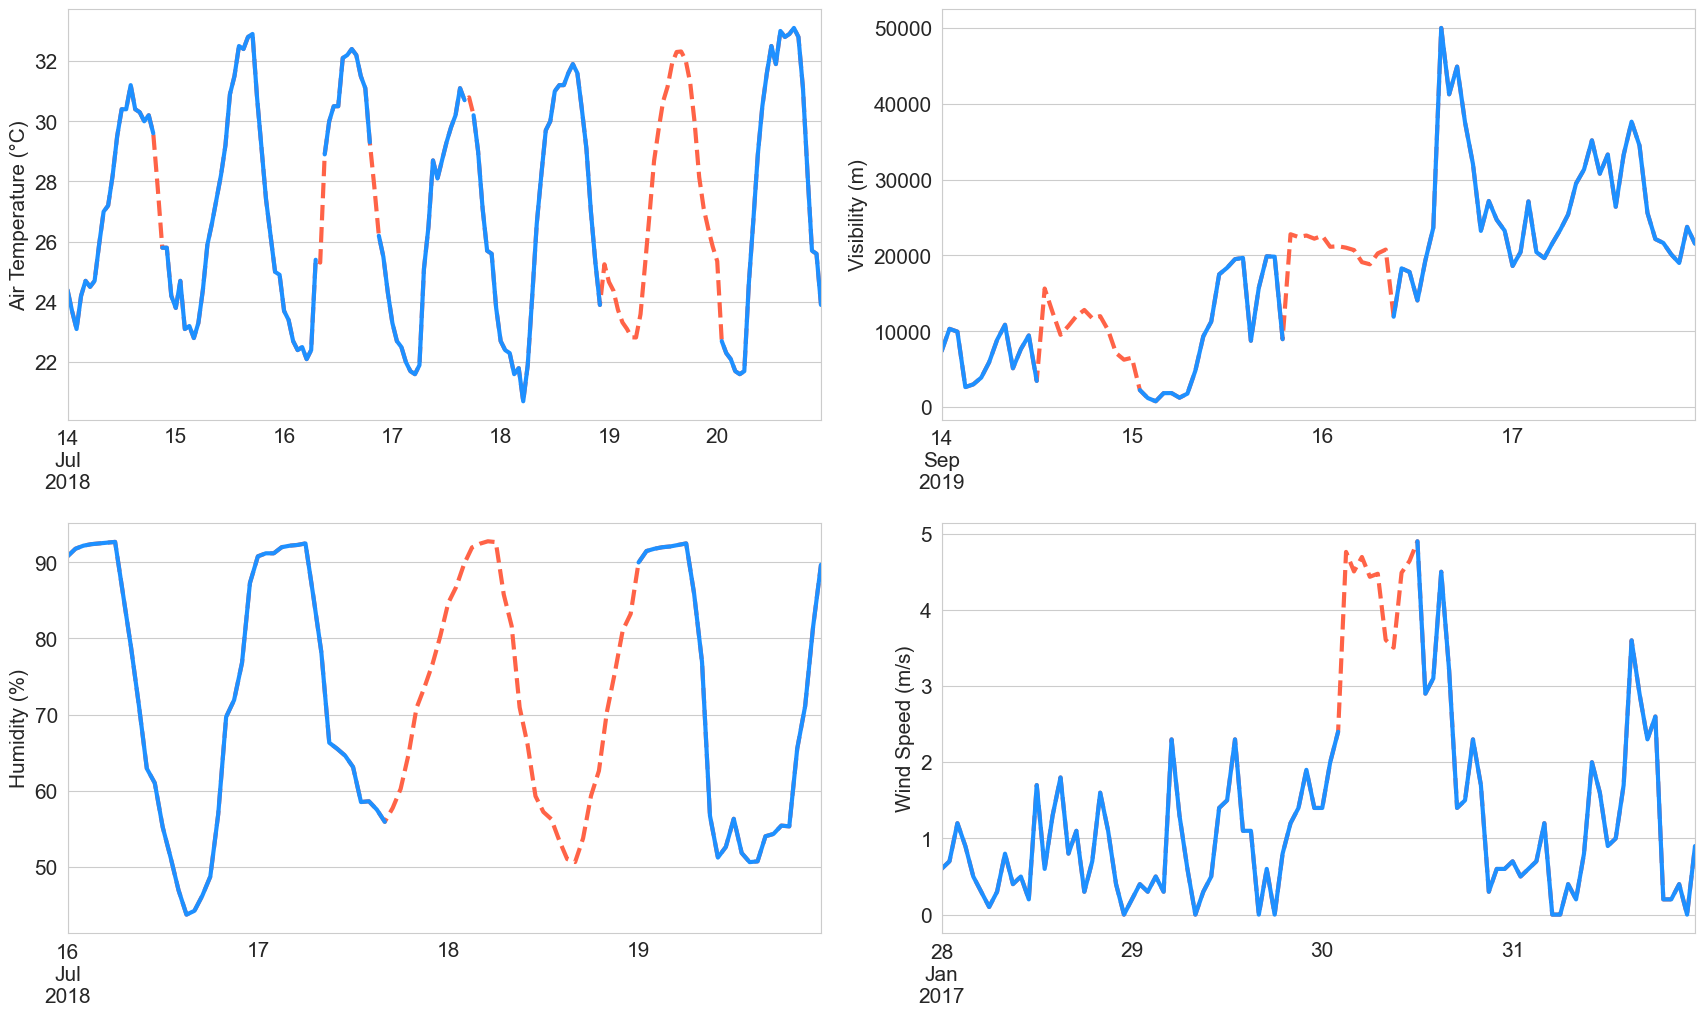

In [4]:
# draw graph
n_row = 2; n_col = 2; line_width = 3
target_num = 131231; temp_year = 2018; temp_month = 7; temp_min_day = 14; temp_max_day = 20
target = "Air Temperature"

fig = plt.figure(figsize=(21, 12)) # fig size
gs = gridspec.GridSpec(nrows=n_row, # row 몇 개 
                       ncols=n_col, # col 몇 개 
                       height_ratios=[1,1], # ratio of heithg
                       width_ratios=[1, 1] # ratio of width
                      )
plt.rcParams["font.size"] = 15  # fontsize 설정
plt.subplots_adjust(wspace = 0.16, hspace = 0.25)

ax = fig.add_subplot(gs[0,0])
temp_ = total_df[[ f'{kind_1} {target}',f'{kind_2} {target}',]]
temp_ = temp_[temp_.index.year == temp_year]
temp_ = temp_[temp_.index.month == temp_month]
temp_ = temp_[(temp_.index.day >= temp_min_day) & (temp_.index.day <= temp_max_day)]
# temp_.plot(linewidth = line_width, ax = ax, color = ['red', 'black'], legend=False)
temp_.iloc[:,0].plot(linewidth = 3, ax = ax, color = ['tomato'], style=["--"], legend=False)
temp_.iloc[:,1].plot(linewidth = 3, ax = ax, color = ['dodgerblue'], style=["-"], legend=False)

plt.xlabel(""); plt.ylabel(f"{target} (°C)")
# plt.title(target)

target_num = 131231; temp_year = 2019; temp_month = 9; temp_min_day = 14; temp_max_day = 17
target = "Visibility"
ax = fig.add_subplot(gs[0,1])
temp_ = total_df[[ f'{kind_1} {target}',f'{kind_2} {target}',]]
temp_ = temp_[temp_.index.year == temp_year]
temp_ = temp_[temp_.index.month == temp_month]
temp_ = temp_[(temp_.index.day >= temp_min_day) & (temp_.index.day <= temp_max_day)]
# temp_.plot(linewidth = line_width, ax = ax, color = ['red', 'black'], legend=False)
temp_.iloc[:,0].plot(linewidth = 3, ax = ax, color = ['tomato'], style=["--"], legend=False)
temp_.iloc[:,1].plot(linewidth = 3, ax = ax, color = ['dodgerblue'], style=["-"], legend=False)

plt.xlabel(""); plt.ylabel(f"{target} (m)")
# plt.title(target)

target_num = 131231; temp_year = 2018; temp_month = 7; temp_min_day = 16; temp_max_day = 19
target = "Humidity"
ax = fig.add_subplot(gs[1,0])
temp_ = total_df[[ f'{kind_1} {target}',f'{kind_2} {target}',]]
temp_ = temp_[temp_.index.year == temp_year]
temp_ = temp_[temp_.index.month == temp_month]
temp_ = temp_[(temp_.index.day >= temp_min_day) & (temp_.index.day <= temp_max_day)]
# temp_.plot(linewidth = 3, ax = ax, color = ['red', 'lightskyblue'], style=["--","-"], legend=False)
temp_.iloc[:,0].plot(linewidth = 3, ax = ax, color = ['tomato'], style=["--"], legend=False)
temp_.iloc[:,1].plot(linewidth = 3, ax = ax, color = ['dodgerblue'], style=["-"], legend=False)

plt.xlabel(""); plt.ylabel(f"{target} (%)")
# plt.title(target)

target_num = 131231; temp_year = 2017; temp_month = 1; temp_min_day = 28; temp_max_day = 31
target = "Wind Speed"
ax = fig.add_subplot(gs[1,1])
temp_ = total_df[[ f'{kind_1} {target}',f'{kind_2} {target}',]]
temp_ = temp_[temp_.index.year == temp_year]
temp_ = temp_[temp_.index.month == temp_month]
temp_ = temp_[(temp_.index.day >= temp_min_day) & (temp_.index.day <= temp_max_day)]
# temp_.plot(linewidth = line_width, ax = ax, color = ['red', 'black'], legend=False)
temp_.iloc[:,0].plot(linewidth = 3, ax = ax, color = ['tomato'], style=["--"], legend=False)
temp_.iloc[:,1].plot(linewidth = 3, ax = ax, color = ['dodgerblue'], style=["-"], legend=False)

plt.xlabel(""); plt.ylabel(f"{target} (m/s)")
# plt.title(target)
plt.savefig("./result/aws_idw_time_series.png", bbox_inches='tight', dpi = 500)
plt.show()